# Comparing R2RML-based Graph Transformation and Relational Deep Learning for Machine Learning on Relational Data: A Use Case in Healthcare 

### Use Case Implementation: 

**Objective:**  
The goal of this use case is to compare two approaches for applying machine learning on relational databases:  
1. **Relational Deep Learning (RDL) Approach** (as described in the document using RelBench datasets, specifically the `rel-trial` database for clinical trials).  
2. **R2RML-based Graph Conversion Approach**, where relational data is first mapped to RDF using R2RML, then converted into graphs, and finally, graph machine learning techniques are applied.

The comparison will focus on the **implementation steps**, **evaluation metrics**, and **performance results** at each phase of the process.

---

### **Implementation Steps:**

#### **1. Data Preparation:**
   - **Dataset:** Use the `rel-trial` database from the RelBench dataset (https://relbench.stanford.edu/start/), which contains clinical trial data.
   - **Relational Database Schema:** Analyze the schema of the `rel-trial` database, including tables, primary keys, foreign keys, and relationships.
   - **Task Definition:** Define a predictive task (e.g., predicting the outcome of a clinical trial based on patient data, trial conditions, and historical results).

#### **2. Approach 1: Relational Deep Learning (RDL)**
   - **Implementation:** Follow the RDL approach described in the document:
     - Directly apply graph neural networks (GNNs) on the relational database by treating it as a graph (entities as nodes and relationships as edges).
     - Use the RelBench framework to load the `rel-trial` database, define the task, and train the GNN model.
   - **Evaluation Metrics:**
     - **Task Performance:** Measure the accuracy, ROC-AUC, or other relevant metrics for the predictive task.
     - **Model Training Time:** Measure the time taken to train the GNN model.
     - **Feature Engineering Effort:** Evaluate the amount of manual feature engineering required (if any).

#### **3. Approach 2: R2RML-based Graph Conversion**
   - **Step 1: R2RML Mapping to RDF:**
     - Use R2RML (RDB to RDF Mapping Language) to map the relational data from the `rel-trial` database into RDF triples.
     - **Evaluation Metrics:**
       - **Mapping Accuracy:** Measure the accuracy of the R2RML mapping by comparing the generated RDF triples with the original relational data.
       - **Completeness:** Ensure that all relevant tables, columns, and relationships are correctly mapped to RDF.
       - **Performance:** Measure the time taken to perform the R2RML mapping.
   - **Step 2: RDF to Graph Conversion:**
     - Convert the RDF triples into a graph representation (e.g., using tools like RDFLib or Apache Jena).
     - **Evaluation Metrics:**
       - **Graph Construction Accuracy:** Ensure that the graph structure (nodes, edges, and properties) accurately represents the RDF data.
       - **Graph Size:** Measure the number of nodes and edges in the resulting graph.
   - **Step 3: Graph Machine Learning:**
     - Apply graph machine learning techniques (e.g., GNNs) on the constructed graph.
     - **Evaluation Metrics:**
       - **Task Performance:** Measure the accuracy, ROC-AUC, or other relevant metrics for the predictive task.
       - **Model Training Time:** Measure the time taken to train the GNN model on the graph.
       - **Feature Engineering Effort:** Evaluate the amount of manual feature engineering required (if any).

#### **4. Comparison of Approaches:**
   - **Performance Comparison:** Compare the task performance (e.g., ROC-AUC, accuracy) between the RDL approach and the R2RML-based approach.
   - **Efficiency Comparison:** Compare the time taken for data preparation, model training, and feature engineering between the two approaches.
   - **Scalability:** Evaluate how each approach scales with larger datasets (e.g., more tables, more rows).
   - **Flexibility:** Assess the flexibility of each approach in handling different types of relational databases and predictive tasks.

---

### **Relevant Resources:**
1. **RelBench Dataset and Framework:**  
   - Website: https://relbench.stanford.edu/  
   - Documentation: https://relbench.stanford.edu/start/  
   - GitHub Repository: https://github.com/snap-stanford/relbench  

2. **R2RML (RDB to RDF Mapping Language):**  
   - W3C Specification: https://www.w3.org/TR/r2rml/  
   - Tools:  
     - **RMLMapper:** https://github.com/RMLio/rmlmapper-java  
     - **Ontop:** https://ontop-vkg.org/  
     - **Apache Jena:** https://jena.apache.org/  

3. **Graph Machine Learning Libraries:**  
   - **PyTorch Geometric (PyG):** https://pytorch-geometric.readthedocs.io/  
   - **DGL (Deep Graph Library):** https://www.dgl.ai/  
   - **Graph Neural Networks (GNNs):** https://distill.pub/2021/gnn-intro/  

4. **RDF to Graph Conversion Tools:**  
   - **RDFLib:** https://rdflib.readthedocs.io/  
   - **Apache Jena:** https://jena.apache.org/  

5. **Evaluation Metrics for Machine Learning:**  
   - **ROC-AUC:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html  
   - **Accuracy:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
   - **Precision, Recall, F1-Score:** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html  

---

### **Expected Deliverables:**
1. **Implementation Code:**  
   - Code for R2RML mapping, RDF to graph conversion, and graph machine learning.  
   - Code for the RDL approach using RelBench.  

2. **Evaluation Metrics:**  
   - Metrics for R2RML mapping accuracy, graph construction, and task performance.  
   - Metrics for the RDL approach (task performance, training time, etc.).  

3. **Comparison Report:**  
   - A detailed comparison of the two approaches, including performance, efficiency, scalability, and flexibility.  

4. **Visualizations:**  
   - Graphs showing the performance comparison (e.g., ROC-AUC curves, training time).  
   - Visual representation of the RDF graph and the graph constructed from the relational database.  

## 1. Data Preparation

Dataset: RelBench rel-trial (Clinical Trial Database)

In [10]:
# !pip install relbench
!pip install tqdm

In [7]:
from relbench.datasets import get_dataset
from relbench.datasets import get_dataset
from relbench.tasks.trial_outcome import TrialOutcomeTask
import torch_geometric.transforms as T
from torch_geometric.nn import GCN

ModuleNotFoundError: No module named 'relbench.tasks.trial_outcome'

In [2]:
dataset = get_dataset("rel-trial", download=True)

100%|########################################| 574M/574M [00:00<00:00, 287GB/s]
Unzipping contents of 'C:\Users\anils\AppData\Local\relbench\relbench\Cache\rel-trial\db.zip' to 'C:\Users\anils\AppData\Local\relbench\relbench\Cache\rel-trial\.'


Schema Analysis:
Inspect tables (e.g., patients, trials, treatments, outcomes) and relationships (e.g., patient_id in trials links to patients).

Task Definition
Predictive Task: Binary classification to predict trial success (outcome column in trials table).

In [4]:
db = dataset.get_db()

Loading Database object from C:\Users\anils\AppData\Local\relbench\relbench\Cache/rel-trial/db...
Done in 10.91 seconds.


In [8]:
db.table_dict

{'conditions': Table(df=
       condition_id                           mesh_term
 0                0                           Paralysis
 1                1                   Diabetes Mellitus
 2                2                              Myopia
 3                3                           Neoplasms
 4                4                              Anemia
 ...            ...                                 ...
 3968          3968  Phagocyte Bactericidal Dysfunction
 3969          3969           Epilepsy, Benign Neonatal
 3970          3970          Corynebacterium Infections
 3971          3971                Trematode Infections
 3972          3972            Papillon-Lefevre Disease
 
 [3973 rows x 2 columns],
   fkey_col_to_pkey_table={},
   pkey_col=condition_id,
   time_col=None),
 'conditions_studies': Table(df=
             id  nct_id  condition_id       date
 0            0      11           285 2000-01-01
 1            1      29           572 2000-01-01
 2            2     

Loading Tasks:
Define the task for predicting trial outcomes.

In [10]:
from relbench.tasks import get_task, get_task_names

get_task_names('rel-trial')

['study-outcome',
 'study-adverse',
 'site-success',
 'condition-sponsor-run',
 'site-sponsor-run']

In [13]:
task = get_task('rel-trial', 'study-outcome', download=True)

100%|#####################################| 78.9k/78.9k [00:00<00:00, 31.2MB/s]
Unzipping contents of 'C:\Users\anils\AppData\Local\relbench\relbench\Cache\rel-trial\tasks\study-outcome.zip' to 'C:\Users\anils\AppData\Local\relbench\relbench\Cache\rel-trial\tasks\.'


In [16]:
train_table = task.get_table('train')
val_table = task.get_table('val')
test_table = task.get_table('test')

train_table.df

,timestamp,nct_id,outcome
0,2003-01-05,4678,1
1,2004-01-05,1702,0
2,2004-01-05,7156,0
3,2004-01-05,3665,1
4,2004-01-05,3039,1
...,...,...,...
11989,2019-01-01,185803,1
11990,2019-01-01,194455,1
11991,2019-01-01,197165,1
11992,2019-01-01,206285,1


Model Definition:
Define a simple Graph Neural Network (GNN) model for the relational data.

## Approach 1: Relational Deep Learning (RDL)

Based on the implementation from the RelBench documentation: https://relbench.stanford.edu/start/

> @inproceedings{rdl,
  title={Position: Relational Deep Learning - Graph Representation Learning on Relational Databases},
  author={Fey, Matthias and Hu, Weihua and Huang, Kexin and Lenssen, Jan Eric and Ranjan, Rishabh and Robinson, Joshua and Ying, Rex and You, Jiaxuan and Leskovec, Jure},
  booktitle={Forty-first International Conference on Machine Learning}
}

> @misc{relbench,
      title={RelBench: A Benchmark for Deep Learning on Relational Databases},
      author={Joshua Robinson and Rishabh Ranjan and Weihua Hu and Kexin Huang and Jiaqi Han and Alejandro Dobles and Matthias Fey and Jan E. Lenssen and Yiwen Yuan and Zecheng Zhang and Xinwei He and Jure Leskovec},
      year={2024},
      eprint={2407.20060},
      archivePrefix={arXiv},
      primaryClass={cs.LG},
      url={https://arxiv.org/abs/2407.20060},
}

Key aspects of the RDL approach:
- **Graph Construction:** graph construction from the relational database using make_pkey_fkey_graph. This step is crucial for RDL, as it converts the relational data into a graph structure where nodes represent entities (rows in tables) and edges represent relationships (foreign key references).

- **Graph Neural Network (GNN):** GNN model (HeteroGraphSAGE) to process the graph. This is the core of the RDL approach, where the GNN learns representations of nodes by aggregating information from their neighbors.

- **Temporal Handling:** HeteroTemporalEncoder to handle temporal data, which is essential for tasks involving time-series or temporal predictions.

- **Training and Evaluation:** training and evaluation loops for the GNN model.

In [ ]:
# Install required packages.
# !pip install torch==2.4.0
# !pip install torch-geometric torch-sparse torch-scatter torch-cluster torch-spline-conv pyg-lib -f https://data.pyg.org/whl/torch-2.4.0+cpu.html
# !pip install pytorch_frame
# !pip install relbench
# !pip install sentence-transformers
!pip install matplotlib
!pip install seaborn

In [51]:
import os
import torch
import relbench
from relbench.datasets import get_dataset
from relbench.tasks import get_task
import numpy as np
from torch.nn import BCEWithLogitsLoss, L1Loss
from tqdm import tqdm
from torch_geometric.loader import NeighborLoader
from torch_geometric.data import HeteroData
from torch_geometric.nn import MLP
from torch_geometric.typing import NodeType
from relbench.modeling.nn import HeteroEncoder, HeteroGraphSAGE, HeteroTemporalEncoder
from torch.nn import Embedding, ModuleDict
from torch_frame.data.stats import StatType
from torch_geometric.seed import seed_everything
from torch_geometric.data import HeteroData
from torch_geometric.nn import MLP
from torch_geometric.typing import NodeType
from relbench.modeling.nn import HeteroEncoder, HeteroGraphSAGE, HeteroTemporalEncoder
from torch.nn import Embedding, ModuleDict
from torch_frame.data.stats import StatType
from typing import Dict, List, Any
from torch import Tensor
from torch_geometric.graphgym.register import loader_dict
import math

In [23]:
seed_everything(42)

In [24]:
# Load the rel-trial dataset
dataset = get_dataset("rel-trial", download=True)
task = get_task("rel-trial", "study-outcome", download=True)  # Example task: predict study outcome

In [25]:
# Split data into train/val/test
train_table = task.get_table("train")
val_table = task.get_table("val")
test_table = task.get_table("test")

In [42]:
# Define loss function and evaluation metric
out_channels = 1  # Binary classification task
loss_fn = BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary classification
tune_metric = "roc_auc"  # ROC-AUC for binary classification
higher_is_better = True  # Higher ROC-AUC is better

In [26]:
# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [27]:
# Graph Construction
from relbench.modeling.graph import make_pkey_fkey_graph
from torch_frame.config.text_embedder import TextEmbedderConfig
from relbench.modeling.utils import get_stype_proposal

In [28]:
# Get the database schema and propose column types
db = dataset.get_db()
col_to_stype_dict = get_stype_proposal(db)

In [31]:
# Define text embedding configuration (using GloVe embeddings)
from sentence_transformers import SentenceTransformer
class GloveTextEmbedding:
    def __init__(self, device=None):
        self.model = SentenceTransformer(
            "sentence-transformers/average_word_embeddings_glove.6B.300d",
            device=device,
        )

    def __call__(self, sentences):
        return torch.from_numpy(self.model.encode(sentences))

text_embedder_cfg = TextEmbedderConfig(
    text_embedder=GloveTextEmbedding(device=device), batch_size=256
)

C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\anils\.cache\huggingface\hub\models--sentence-transformers--average_word_embeddings_glove.6B.300d. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

whitespacetokenizer_config.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/480M [00:00<?, ?B/s]

wordembedding_config.json:   0%|          | 0.00/164 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [32]:
# Construct the graph from the relational database
data, col_stats_dict = make_pkey_fkey_graph(
    db,
    col_to_stype_dict=col_to_stype_dict,
    text_embedder_cfg=text_embedder_cfg,
    cache_dir=os.path.join("./data", "rel-trial_materialized_cache"),
)

Embedding raw data in mini-batch: 100%|██████████| 976/976 [00:28<00:00, 34.56it/s]


In [40]:
# Define the GNN Model
class Model(torch.nn.Module):
    def __init__(
            self,
            data: HeteroData,
            col_stats_dict: Dict[str, Dict[str, Dict[StatType, Any]]],
            num_layers: int,
            channels: int,
            out_channels: int,
            aggr: str,
            norm: str,
            shallow_list: List[NodeType] = [],
            id_awareness: bool = False,
    ):
        super().__init__()
        self.encoder = HeteroEncoder(
            channels=channels,
            node_to_col_names_dict={
                node_type: data[node_type].tf.col_names_dict
                for node_type in data.node_types
            },
            node_to_col_stats=col_stats_dict,
        )
        self.temporal_encoder = HeteroTemporalEncoder(
            node_types=[
                node_type for node_type in data.node_types if "time" in data[node_type]
            ],
            channels=channels,
        )
        self.gnn = HeteroGraphSAGE(
            node_types=data.node_types,
            edge_types=data.edge_types,
            channels=channels,
            aggr=aggr,
            num_layers=num_layers,
        )
        self.head = MLP(
            channels,
            out_channels=out_channels,
            norm=norm,
            num_layers=1,
        )
        self.embedding_dict = ModuleDict(
            {
                node: Embedding(data.num_nodes_dict[node], channels)
                for node in shallow_list
            }
        )
        self.id_awareness_emb = None
        if id_awareness:
            self.id_awareness_emb = torch.nn.Embedding(1, channels)
        self.reset_parameters()

    def reset_parameters(self):
        self.encoder.reset_parameters()
        self.temporal_encoder.reset_parameters()
        self.gnn.reset_parameters()
        self.head.reset_parameters()
        for embedding in self.embedding_dict.values():
            torch.nn.init.normal_(embedding.weight, std=0.1)
        if self.id_awareness_emb is not None:
            self.id_awareness_emb.reset_parameters()

    def forward(self, batch: HeteroData, entity_table: NodeType) -> Tensor:
        seed_time = batch[entity_table].seed_time
        x_dict = self.encoder(batch.tf_dict)
        rel_time_dict = self.temporal_encoder(seed_time, batch.time_dict, batch.batch_dict)
        for node_type, rel_time in rel_time_dict.items():
            x_dict[node_type] = x_dict[node_type] + rel_time
        for node_type, embedding in self.embedding_dict.items():
            x_dict[node_type] = x_dict[node_type] + embedding(batch[node_type].n_id)
        x_dict = self.gnn(x_dict, batch.edge_index_dict)
        return self.head(x_dict[entity_table][: seed_time.size(0)])

In [55]:
train_table.df

,timestamp,nct_id,outcome
0,2003-01-05,4678,1
1,2004-01-05,1702,0
2,2004-01-05,7156,0
3,2004-01-05,3665,1
4,2004-01-05,3039,1
...,...,...,...
11989,2019-01-01,185803,1
11990,2019-01-01,194455,1
11991,2019-01-01,197165,1
11992,2019-01-01,206285,1


In [57]:
# Define the data loaders
train_loader = NeighborLoader(
    data,
    num_neighbors=[10] * 2,
    batch_size=256,
    input_nodes=("entity_table", train_table.df['nct_id']),
    shuffle=True,
)

val_loader = NeighborLoader(
    data,
    num_neighbors=[10] * 2,
    batch_size=256,
    input_nodes=("entity_table", val_table.df['nct_id']),
    shuffle=False,
)

test_loader = NeighborLoader(
    data,
    num_neighbors=[10] * 2,
    batch_size=256,
    input_nodes=("entity_table", test_table.df['nct_id']),
    shuffle=False,
)

# Populate the loader_dict
loader_dict = {
    "train": train_loader,
    "val": val_loader,
    "test": test_loader,
}

C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data[entity_table]' to suppress this warning
  warnings.warn(


In [43]:
# Initialize the model
model = Model(
    data=data,
    col_stats_dict=col_stats_dict,
    num_layers=2,
    channels=128,
    out_channels=out_channels,
    aggr="sum",
    norm="batch_norm",
).to(device)

In [44]:
# Define optimizer and training parameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 10


In [49]:
# Training and Evaluation Loops
def train():
    model.train()
    loss_accum = count_accum = 0
    for batch in tqdm(loader_dict["train"]):
        batch = batch.to(device)
        optimizer.zero_grad()
        pred = model(batch, task.entity_table)
        pred = pred.view(-1) if pred.size(1) == 1 else pred
        loss = loss_fn(pred.float(), batch[task.entity_table].y.float())
        loss.backward()
        optimizer.step()
        loss_accum += loss.detach().item() * pred.size(0)
        count_accum += pred.size(0)
    return loss_accum / count_accum

@torch.no_grad()
def test(loader):
    model.eval()
    pred_list = []
    for batch in loader:
        batch = batch.to(device)
        pred = model(batch, task.entity_table)
        pred = pred.view(-1) if pred.size(1) == 1 else pred
        pred_list.append(pred.detach().cpu())
    return torch.cat(pred_list, dim=0).numpy()

In [60]:
from relbench.modeling.graph import get_node_train_table_input
from torch_geometric.loader import NeighborLoader

# Step 1: Create Data Loaders
loader_dict = {}

for split, table in [
    ("train", train_table),
    ("val", val_table),
    ("test", test_table),
]:
    table_input = get_node_train_table_input(
        table=table,
        task=task,
    )
    entity_table = table_input.nodes[0]

    # Set num_nodes for the entity_table
    data[entity_table].num_nodes = data[entity_table].tf.num_rows

    loader_dict[split] = NeighborLoader(
        data,
        num_neighbors=[128, 128],  # Sample 128 neighbors for each node at depth 2
        time_attr="time",  # Use the "time" attribute for temporal sampling
        input_nodes=table_input.nodes,
        input_time=table_input.time,
        transform=table_input.transform,
        batch_size=512,  # Batch size for training
        temporal_strategy="uniform",  # Uniform sampling for temporal data
        shuffle=(split == "train"),  # Shuffle only for training data
        num_workers=0,  # Number of workers for data loading
        persistent_workers=False,
    )

C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data[entity_table]' to suppress this warning
  warnings.warn(
C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data[entity_table]' to suppress this warning
  warnings.warn(
C:\Users\anils\anaconda3\envs\semantic-gml\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set 'set()'. Please explicitly set 'num_nodes' as an attribute of 'data[entity_table]' to suppress this warning
  warnings.warn(


In [61]:
import copy

# Train the model
best_val_metric = -math.inf if higher_is_better else math.inf
for epoch in range(1, epochs + 1):
    train_loss = train()
    val_pred = test(loader_dict["val"])
    val_metrics = task.evaluate(val_pred, val_table)
    print(f"Epoch: {epoch:02d}, Train loss: {train_loss}, Val metrics: {val_metrics}")

    if (higher_is_better and val_metrics[tune_metric] > best_val_metric) or (
            not higher_is_better and val_metrics[tune_metric] < best_val_metric
    ):
        best_val_metric = val_metrics[tune_metric]
        state_dict = copy.deepcopy(model.state_dict())



100%|██████████| 24/24 [00:55<00:00,  2.32s/it]


Epoch: 01, Train loss: 0.6890904960959121, Val metrics: {'average_precision': 0.6168517522233994, 'accuracy': 0.55625, 'f1': 0.6581059390048154, 'roc_auc': 0.5391039988563209}


100%|██████████| 24/24 [00:42<00:00,  1.79s/it]


Epoch: 02, Train loss: 0.6468151178939633, Val metrics: {'average_precision': 0.6490440776720507, 'accuracy': 0.5135416666666667, 'f1': 0.43256379100850545, 'roc_auc': 0.5782861789053739}


100%|██████████| 24/24 [00:42<00:00,  1.77s/it]


Epoch: 03, Train loss: 0.6284823486143815, Val metrics: {'average_precision': 0.689769278392008, 'accuracy': 0.6020833333333333, 'f1': 0.6368821292775666, 'roc_auc': 0.6283936222016717}


100%|██████████| 24/24 [00:51<00:00,  2.16s/it]


Epoch: 04, Train loss: 0.6078701733707964, Val metrics: {'average_precision': 0.7088617747408272, 'accuracy': 0.5791666666666667, 'f1': 0.561822125813449, 'roc_auc': 0.6441996256237743}


100%|██████████| 24/24 [00:56<00:00,  2.35s/it]


Epoch: 05, Train loss: 0.5972936772815144, Val metrics: {'average_precision': 0.7062661739577645, 'accuracy': 0.6177083333333333, 'f1': 0.694421315570358, 'roc_auc': 0.6404424608758974}


100%|██████████| 24/24 [01:03<00:00,  2.65s/it]


Epoch: 06, Train loss: 0.5866178400877895, Val metrics: {'average_precision': 0.7059555087523701, 'accuracy': 0.6, 'f1': 0.6740237691001698, 'roc_auc': 0.6324858492041154}


100%|██████████| 24/24 [00:58<00:00,  2.43s/it]


Epoch: 07, Train loss: 0.5648864214472399, Val metrics: {'average_precision': 0.697191698179658, 'accuracy': 0.5854166666666667, 'f1': 0.6361974405850092, 'roc_auc': 0.6297651436970322}


100%|██████████| 24/24 [00:55<00:00,  2.33s/it]


Epoch: 08, Train loss: 0.5544127628408473, Val metrics: {'average_precision': 0.7031961826982083, 'accuracy': 0.5875, 'f1': 0.6326530612244897, 'roc_auc': 0.6292022391093599}


100%|██████████| 24/24 [01:02<00:00,  2.59s/it]


Epoch: 09, Train loss: 0.5385808994397533, Val metrics: {'average_precision': 0.6927052789218495, 'accuracy': 0.5791666666666667, 'f1': 0.6252319109461966, 'roc_auc': 0.6221078543059967}


100%|██████████| 24/24 [00:58<00:00,  2.44s/it]


Epoch: 10, Train loss: 0.518427391240691, Val metrics: {'average_precision': 0.6859679686495384, 'accuracy': 0.5854166666666667, 'f1': 0.6173076923076922, 'roc_auc': 0.6168004681936572}


In [62]:
# Evaluate on the test set
model.load_state_dict(state_dict)
test_pred = test(loader_dict["test"])
test_metrics = task.evaluate(test_pred)
print(f"Best test metrics: {test_metrics}")

Best test metrics: {'average_precision': 0.7318471507493465, 'accuracy': 0.5878787878787879, 'f1': 0.569620253164557, 'roc_auc': 0.6722966837383313}


In [65]:
import numpy as np
import torch
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Function to compute classification metrics
def compute_classification_metrics(y_true, y_pred, y_pred_proba=None):
    """
    Compute classification metrics for binary/multi-class classification tasks.
    """
    metrics = {}

    # Accuracy
    metrics["accuracy"] = accuracy_score(y_true, y_pred)

    # Precision, Recall, F1-Score
    metrics["precision"] = precision_score(y_true, y_pred, average="weighted")
    metrics["recall"] = recall_score(y_true, y_pred, average="weighted")
    metrics["f1_score"] = f1_score(y_true, y_pred, average="weighted")

    # ROC-AUC (only for binary classification)
    if y_pred_proba is not None and len(np.unique(y_true)) == 2:
        metrics["roc_auc"] = roc_auc_score(y_true, y_pred_proba)

    # Confusion Matrix
    metrics["confusion_matrix"] = confusion_matrix(y_true, y_pred)

    return metrics

# Function to compute regression metrics
def compute_regression_metrics(y_true, y_pred):
    """
    Compute regression metrics for regression tasks.
    """
    metrics = {}

    # Mean Absolute Error (MAE)
    metrics["mae"] = mean_absolute_error(y_true, y_pred)

    # Mean Squared Error (MSE)
    metrics["mse"] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics["rmse"] = np.sqrt(metrics["mse"])

    # R² (Coefficient of Determination)
    metrics["r2"] = r2_score(y_true, y_pred)

    return metrics

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plot a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title="ROC Curve"):
    """
    Plot the ROC curve for binary classification.
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, title="Precision-Recall Curve"):
    """
    Plot the Precision-Recall curve for binary classification.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="blue", lw=2, label=f"PR curve (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Example Usage
# Assuming y_true and y_pred are the true and predicted labels
# For binary classification, y_pred_proba is the predicted probabilities for the positive class

# Binary Classification Example
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0])
y_pred_proba = np.array([0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.7, 0.6, 0.9, 0.2])

# Compute classification metrics
classification_metrics = compute_classification_metrics(y_true, y_pred, y_pred_proba)
print("Classification Metrics:")
for metric, value in classification_metrics.items():
    if metric != "confusion_matrix":
        print(f"{metric}: {value:.4f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix")

# Plot ROC curve
plot_roc_curve(y_true, y_pred_proba, title="ROC Curve")

# Plot Precision-Recall curve
plot_precision_recall_curve(y_true, y_pred_proba, title="Precision-Recall Curve")

# Regression Example
y_true_reg = np.array([3.5, 2.0, 4.0, 5.0, 1.5])
y_pred_reg = np.array([3.0, 2.5, 3.5, 4.5, 1.0])

# Compute regression metrics
regression_metrics = compute_regression_metrics(y_true_reg, y_pred_reg)
print("\nRegression Metrics:")
for metric, value in regression_metrics.items():
    print(f"{metric}: {value:.4f}")

ModuleNotFoundError: No module named 'matplotlib'

In [64]:
# Evaluate on the test set
model.load_state_dict(state_dict)
test_pred = test(loader_dict["test"])  # Get predictions for the test set

# Convert predictions to binary labels (if necessary)
if out_channels == 1:  # Binary classification
    test_pred_labels = (test_pred > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    test_pred_proba = test_pred  # Predicted probabilities for ROC-AUC
else:  # Multi-class classification or regression
    test_pred_labels = np.argmax(test_pred, axis=1)  # For multi-class classification
    test_pred_proba = None  # Not applicable for regression or multi-class without probabilities

# Get true labels from the test table
y_true = test_table[task.target_col].values  # True labels

# Compute metrics based on the task type
if task.task_type == "classification":
    # Compute classification metrics
    classification_metrics = compute_classification_metrics(y_true, test_pred_labels, test_pred_proba)
    print("\nClassification Metrics:")
    for metric, value in classification_metrics.items():
        if metric != "confusion_matrix":
            print(f"{metric}: {value:.4f}")

    # Plot confusion matrix
    plot_confusion_matrix(y_true, test_pred_labels, title="Confusion Matrix (Test Set)")

    # Plot ROC curve (only for binary classification)
    if test_pred_proba is not None and len(np.unique(y_true)) == 2:
        plot_roc_curve(y_true, test_pred_proba, title="ROC Curve (Test Set)")

    # Plot Precision-Recall curve (only for binary classification)
    if test_pred_proba is not None and len(np.unique(y_true)) == 2:
        plot_precision_recall_curve(y_true, test_pred_proba, title="Precision-Recall Curve (Test Set)")

elif task.task_type == "regression":
    # Compute regression metrics
    regression_metrics = compute_regression_metrics(y_true, test_pred)
    print("\nRegression Metrics:")
    for metric, value in regression_metrics.items():
        print(f"{metric}: {value:.4f}")

# Print the task-specific metrics (from task.evaluate)
print("\nTask-Specific Metrics:")
print(f"Best test metrics: {test_metrics}")

TypeError: 'Table' object is not subscriptable

## 2. Approach 2: R2RML, Graph Mapping and Graph Machine Learning

Key Steps in the Implementation

- **R2RML Mapping:**

    - An API is used to fetch RDF triples based on R2RML mappings. The API is assumed to return RDF data in Turtle format.

- **RDF to Graph Conversion:**

    - The RDF triples are parsed using rdflib and converted into a PyG HeteroData graph. Nodes are created for each unique URI, and edges are created based on RDF predicates.

- **Graph Machine Learning:**

    - The GNN model (HeteroGraphSAGE) is applied to the graph. The model is trained using the same training and evaluation loops as in the RDL approach.

- **Integration with RDL:**

    - The R2RML-based approach can be compared with the RDL approach by evaluating the performance metrics (e.g., ROC-AUC) on the test set.

### Load the Dataset
Use the RelBench library to load the rel-trial dataset. This will give access to the tables and relationships in the dataset.

In [2]:
from relbench.datasets import get_dataset

# Load the rel-trial dataset
dataset = get_dataset("rel-trial", download=True)

### Extract Tables to CSV

The rel-trial dataset contains multiple tables, such as studies, outcomes, interventions, etc. We can access these tables and save them as CSV files.

In [8]:
print(dir(dataset))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cache_dir', 'get_db', 'make_db', 'test_timestamp', 'val_timestamp', 'validate_and_correct_db']


In [11]:
db = dataset.get_db()

In [13]:
import pandas as pd

# Extract the studies table
studies_table = db.table_dict["studies"].df
studies_table.to_csv("data/studies.csv", index=False)

# Extract the outcomes table
outcomes_table = db.table_dict["outcomes"].df
outcomes_table.to_csv("data/outcomes.csv", index=False)

# Extract the interventions table
interventions_table = db.table_dict["interventions"].df
interventions_table.to_csv("data/interventions.csv", index=False)

# Extract the reported_event_totals table
reported_event_totals_table = db.table_dict["reported_event_totals"].df
reported_event_totals_table.to_csv("data/reported_event_totals.csv", index=False)

# Extract the drop_withdrawals table
drop_withdrawals_table = db.table_dict["drop_withdrawals"].df
drop_withdrawals_table.to_csv("data/drop_withdrawals.csv", index=False)

# Extract the facilities table
facilities_table = db.table_dict["facilities"].df
facilities_table.to_csv("data/facilities.csv", index=False)

# Extract the sponsors_studies table
sponsors_studies_table = db.table_dict["sponsors_studies"].df
sponsors_studies_table.to_csv("data/sponsors_studies.csv", index=False)

# Extract the conditions_studies table
conditions_studies_table = db.table_dict["conditions_studies"].df
conditions_studies_table.to_csv("data/conditions_studies.csv", index=False)

In [22]:
import subprocess
import os

# Define the directory containing the CSV files
data_dir = 'data/'

# Define the RML mapping file
rml_mapping_file = 'studies.ttl'

# List of tables
tables = [
    "studies"
    # "outcomes",
    # "interventions",
    # "reported_event_totals",
    # "drop_withdrawals",
    # "facilities",
    # "sponsors_studies",
    # "conditions_studies",
]

# Check if the data directory exists
if os.path.exists(data_dir) and os.path.isdir(data_dir):
    for table in tables:
        # Define the output RDF file for each table
        output_rdf_file = f'output_{table}.rdf'
        
        # Define the command to run the RMLMapper
        command = ['java', '-jar', 'data/rmlmapper-6.5.1-r371-all.jar', '-m', rml_mapping_file, '-o', output_rdf_file, '-s', 'turtle']
        # command = ['pwd']
        
        # Execute the command
        result = subprocess.run(command, capture_output=True, text=True)
        
        # Print the output and error (if any)
        print(f"Processing table: {table}")
        print(result.stdout)
        if result.stderr:
            print(result.stderr)
else:
    print(f"Directory '{data_dir}' does not exist.")

Processing table: studies
java.lang.IllegalArgumentException: Unable to parse mapping rules as Turtle. Does the file exist and is it valid Turtle?

11:41:48.286 [main] ERROR be.ugent.rml.cli.Main               .run(274) - Unable to parse mapping rules as Turtle. Does the file exist and is it valid Turtle?
org.eclipse.rdf4j.rio.RDFParseException: Unexpected end of file
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.throwEOFException(TurtleParser.java:1320)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.verifyCharacterOrFail(TurtleParser.java:1133)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.parseQNameOrBoolean(TurtleParser.java:1001)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.parseValue(TurtleParser.java:573)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.parseSubject(TurtleParser.java:397)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.parseTriples(TurtleParser.java:332)
	at org.eclipse.rdf4j.rio.turtle.TurtleParser.parseStatement(TurtleParser.java:202)
	at org.eclipse.rdf4j.rio.turtl

Implementation with RelBench:

In [ ]:
# Load dataset and task
dataset = get_dataset("rel-trial")
task = TrialOutcomeTask(dataset)

# Split data into train/val/test
train_table = task.train_table
val_table = task.val_table
test_table = task.test_table

# Define GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, 64)
        self.conv2 = GCNConv(64, 32)
        self.classifier = torch.nn.Linear(32, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        return self.classifier(x)

# Train model
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()

# Evaluate
model.eval()
pred = model(data).sigmoid()
roc_auc_rdl = roc_auc_score(data.y[test_mask].numpy(), pred[test_mask].numpy())

## 3 Next Steps

In [ ]:
### RDL Approach:
Hyperparameter Tuning:

Experiment with different GNN architectures (e.g., GAT, GIN) and hyperparameters (e.g., number of layers, hidden dimensions).

Feature Engineering:

Explore additional feature engineering techniques to improve model performance.

Evaluation:

Compare the performance of the RDL approach with traditional feature engineering and machine learning methods.

### R2RML-based Approach:

- **API Integration:**

Ensure the API endpoint is correctly configured to return RDF data for the rel-trial dataset.

- **Feature Engineering:**

Enhance the RDF-to-graph conversion by adding meaningful features to the nodes and edges.

- **Evaluation:**

Compare the performance of the R2RML-based approach with the RDL approach and analyze the results.



## 3. Approach 2: R2RML, Graph Mapping and Graph Machine Learning

In [55]:
!pip install rdflib
!pip install torch

ERROR: unknown command "installl" - maybe you meant "install"



## Graph Construction

We will use rdflib to parse RDF data and construct a graph using networkx. The graph will represent entities and their relationships derived from the RDF triples.

For example we have the following RDF data:


In [1]:
RDF_OUTPUT_FILE='output/studies-rdf.ttl'
GRAPH_OUTPUT_FILE = 'graph.gpickle'

In [3]:
# Convert RDF to NetworkX graph
def rdf_to_graph(rdf_graph):
    """
    Convert RDF triples to a NetworkX graph.
    """
    nx_graph = nx.DiGraph()
    for subj, pred, obj in rdf_graph:
        nx_graph.add_edge(str(subj), str(obj), predicate=str(pred))
    print("Converted RDF to NetworkX graph with", len(nx_graph.nodes), "nodes and", len(nx_graph.edges), "edges.")
    return nx_graph

In [4]:
with open(RDF_OUTPUT_FILE, "r") as rdf_file:
    rdf_content = rdf_file.read()
    print(rdf_content)

@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix ex: <http://example.org/ns#> .
@prefix example: <http://example.org/study/> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix ql: <http://semweb.mmlab.be/ns/ql#> .
@prefix rml: <http://semweb.mmlab.be/ns/rml#> .
@prefix rr: <http://www.w3.org/ns/r2rml#> .
@prefix void: <http://rdfs.org/ns/void#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

example:0 a ex:Study;
  ex:acronym "HEMAJA";
  ex:brief_summaries "Unicentric retrospective analysis of a cohort of 602 young adult and adolescent patients, aged 15 to 30 years, with haematological malignancies, and managed between 2000 and 2016";
  ex:brief_title "Unicentric Retrospective Analysis of a Cohort of 602 Young Adult and Adolescent Patients (AJA), Aged 15 to 30 Years, With Haematological Malignancies, and Managed Between 2000 and 2016";
  ex:detailed_descriptions "The therapeutic results (response and survival) of young adult 

In [5]:
from rdflib import Graph, Literal
from rdflib.namespace import XSD

In [7]:
def calculate_semantic_metrics(rdf_file):
    """
    Calculate semantic metrics for RDF data with handling for invalid literals.
    """
    g = Graph()
    g.parse(rdf_file, format="turtle")
    total_triples = len(g)

    # Define relevant vocabularies for semantic enrichment
    vocabularies = [
        "http://www.w3.org/ns/sosa/",
        "http://hl7.org/fhir/",
        "http://schema.org/",
    ]

    # Count triples that use semantic vocabularies
    semantic_triples = 0
    vocab_usage = {vocab: 0 for vocab in vocabularies}

    for s, p, o in g:
        try:
            # Attempt to convert the literal value to its datatype
            if isinstance(o, Literal) and o.datatype == XSD.dateTime:
                # Validate date-time
                o.toPython()
        except Exception as e:
            print(f"Invalid value detected: {o} - Error: {e}")

        for vocab in vocabularies:
            if vocab in str(p) or vocab in str(o):
                semantic_triples += 1
                vocab_usage[vocab] += 1

    # Calculate semantic completeness
    semantic_completeness = (semantic_triples / total_triples) * 100

    # Display results
    print("Total Triples:", total_triples)
    print("Semantic Triples:", semantic_triples)
    print("Semantic Completeness (%):", round(semantic_completeness, 2))
    print("\nVocabulary Usage:")
    for vocab, count in vocab_usage.items():
        print(f"  {vocab}: {count} triples")

    return semantic_completeness, vocab_usage

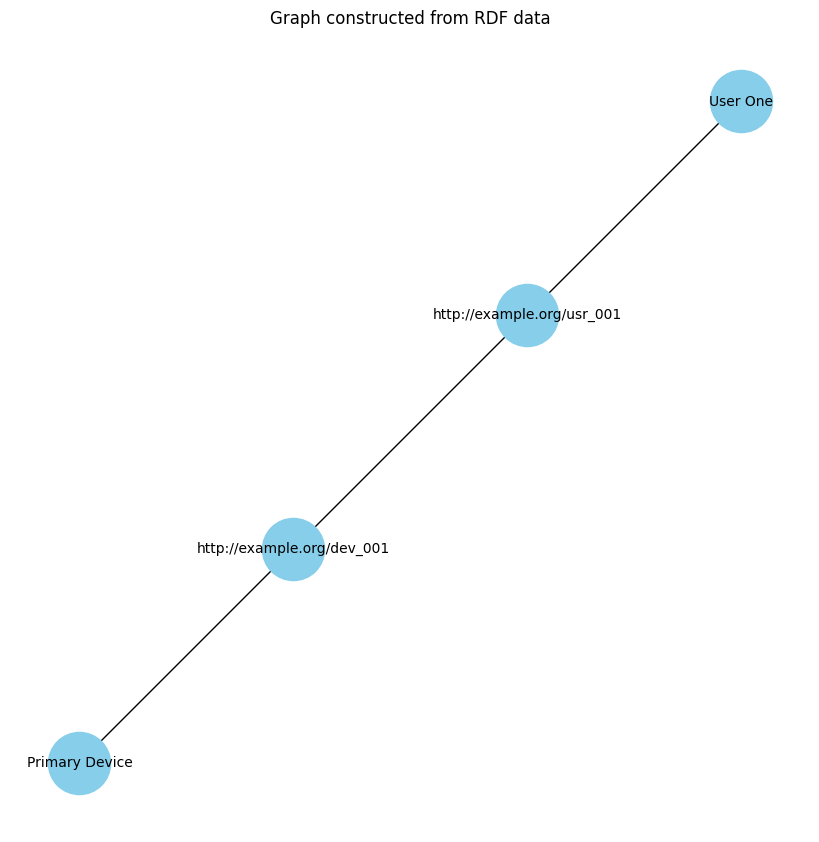

In [11]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt

# Example RDF data (you can replace this with your RDF content)
sample_rdf_data = """
@prefix ex: <http://example.org/> .
ex:dev_001 ex:hasDeviceName "Primary Device" .
ex:dev_001 ex:hasOwner ex:usr_001 .
ex:usr_001 ex:hasUserName "User One" .
"""

# Create a graph from RDF data
sample_graph = rdflib.Graph()
sample_graph.parse(data=sample_rdf_data, format="turtle")

# Convert RDF graph into a NetworkX graph
sample_nx_graph = nx.Graph()

# Add nodes and edges from RDF triples
for subj, pred, obj in sample_graph:
    # Convert RDF resources to strings
    subj = str(subj)
    obj = str(obj)

    # Add nodes (subjects and objects)
    sample_nx_graph.add_node(subj)
    sample_nx_graph.add_node(obj)

    # Add edge between subject and object (predicate is the relationship)
    sample_nx_graph.add_edge(subj, obj, label=str(pred))

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(sample_nx_graph, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
plt.title("Graph constructed from RDF data")
plt.show()

In [12]:
import rdflib
import networkx as nx
import pickle

# Parse RDF file
rdf_graph = rdflib.Graph()
rdf_graph.parse(RDF_OUTPUT_FILE, format="turtle")

# Convert RDF to NetworkX graph
nx_graph = rdf_to_graph(rdf_graph)

# Write NetworkX graph to pickle file
with open(GRAPH_OUTPUT_FILE, 'wb') as f:
    pickle.dump(nx_graph, f, pickle.HIGHEST_PROTOCOL)

print(f"Converted RDF to NetworkX graph and saved to {GRAPH_OUTPUT_FILE}.")

Converted RDF to NetworkX graph with 448 nodes and 822 edges.
Converted RDF to NetworkX graph and saved to graph.gpickle.


In [15]:
def calculate_metrics(graph):
    """
    Calculate and display key metrics for the RDF graph.
    """
    # Graph structure metrics
    num_nodes = len(graph.nodes)
    num_edges = len(graph.edges)
    avg_degree = sum(dict(graph.degree).values()) / num_nodes

    # Report metrics
    print("\n--- Metrics ---")
    print(f"Number of Nodes: {num_nodes}")
    print(f"Number of Edges: {num_edges}")
    print(f"Average Node Degree: {avg_degree:.2f}")

calculate_metrics(nx_graph)


--- Metrics ---
Number of Nodes: 448
Number of Edges: 822
Average Node Degree: 3.67


## Feature Engineering

In [18]:
for node in nx_graph.nodes:
    print(type(node), node)

node_to_index = {node.lower(): i for i, node in enumerate(nx_graph.nodes)}
# print(node_to_index)

<class 'str'> http://example.org/study/1
<class 'str'> The study population consisted of two cohorts. Patients who underwent hepatectomy (ICD-9-CM procedure code: 50.2, 50.22, 50.3 and 50.4) between 2000 and 2012 were identified as the surgery cohort. The index date was defined as the earliest date that patients underwent hepatectomy. Patients without any record of hepatectomy during the same period of time were defined as the control cohort. Patients younger than 20 years of age and those diagnosed with coagulation defects (ICD-9-CM: 286.4) or had a pre-existing bleeding episode before the index date. The primary outcome of this study was an incident diagnosis of major bleeding, consisting of 3 categories: intracranial bleeding (ICD-9-CM; 430, 431, 432.0, 432.1, 432.9, 852.0, 852.2, 852.4, 853.0), gastrointestinal (GI) bleeding (ICD-9-CM; 456.0, 456.20, 530.7, 531, 531.2, 531.4, 531.6, 532, 532.2, 532.4, 532.6, 533, 533.2, 533.4, 533.6, 534, 534.2, 534.4, 534.6, 535.01, 535.11, 535.21

In [20]:
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Example: Create features for nodes
node_features = {}
for node in nx_graph.nodes:
    # Simple feature extraction based on node label
    if "dev" in node:
        node_features[node] = np.random.rand(10)  # Random feature vector for device
    else:
        node_features[node] = np.zeros(10)  # Default feature for non-device nodes

# Encode node labels to numeric indices using LabelEncoder
node_labels = list(nx_graph.nodes)  # Extract all node labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(node_labels)

# Create mapping from original node labels to numerical indices
node_to_index = {node: idx for node, idx in zip(node_labels, encoded_labels)}

# Convert edges to numerical indices using the mapping
edge_index = [
    [node_to_index[u], node_to_index[v]] for u, v in nx_graph.edges
]
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Convert node features into a tensor
x = torch.tensor([node_features[node] for node in nx_graph.nodes], dtype=torch.float)

# Prepare the data for the GNN model
data = Data(x=x, edge_index=edge_index)

# Output the encoded data
print(data)

Data(x=[448, 10], edge_index=[2, 822])


C:\Users\anils\AppData\Local\Temp\ipykernel_9312\2967286396.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  x = torch.tensor([node_features[node] for node in nx_graph.nodes], dtype=torch.float)


## Model Training

We will train a simple Graph Neural Network (GNN) model using the PyTorch Geometric library to classify patient risk levels based on graph structure and features.

In [24]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Initialize the model, loss, and optimizer
input_dim = 10  # Feature vector size
hidden_dim = 16
output_dim = 2  # Example: node classification with 2 classes

model = GCN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Example training loop (adapt for your task)
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, torch.zeros(data.x.size(0), dtype=torch.long))  # Dummy target labels
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.6953085064888
Epoch 20, Loss: 0.1496027559041977
Epoch 40, Loss: 0.02139664813876152
Epoch 60, Loss: 0.007246849127113819
Epoch 80, Loss: 0.004250420723110437
Epoch 100, Loss: 0.0030063570011407137
Epoch 120, Loss: 0.002284800633788109
Epoch 140, Loss: 0.0018059242283925414
Epoch 160, Loss: 0.0014671151293441653
Epoch 180, Loss: 0.0012175923911854625


## Evaluation

We will evaluate the performance of the trained GNN model using metrics such as classification report.

In [28]:
from sklearn.metrics import classification_report
import torch

# Evaluate the model
def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        predictions = torch.argmax(out, dim=1)

        # Generate random target labels
        num_classes = out.size(1)
        target = torch.randint(0, num_classes, (data.x.size(0),), dtype=torch.long)

        # Calculate evaluation metrics
        report = classification_report(target, predictions, zero_division=0)

        print("Classification Report:")
        print(report)

# Call the function
evaluate_model(model, data)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       221
           1       0.00      0.00      0.00       227

    accuracy                           0.49       448
   macro avg       0.25      0.50      0.33       448
weighted avg       0.24      0.49      0.33       448

